# Esercizio 9


### The Traveling Salesman Problem

Con il "Problema del Commesso Viaggiatore" si intende un problema di ottimizzazione che risponde al quesito: qual è il percorso minimo dato un certo numero di città da visitare, con le condizioni di visitarle tutte una volta sola e di tornare infine al punto di partenza? La risoluzione di un problema di ottimizzazione può avvenire per algoritmi deterministici, i quali assicurano di raggiungere il medesimo punto di arrivo una volta scelto lo stesso punto iniziale, oppure attraverso algoritmi stocastici/euristici. A questa categoria appartiene l'algoritmo genetico utilizzato per risolvere questo problema: un algoritmo genetico sfrutta le due leve tipiche del processo evolutivo che avviene in natura. La prima leva è la diversità, operando ricombinazioni del corredo genetico di un individuo attraverso processi randomici di mutazione e ricombinazione, mentre la seconda è la selezione, ovvero prediligere certi individui rispetto che altri per la creazione dei successivi, basandosi sulla loro adattabilità e adeguatezza in relazione ai vincoli posti dall'ambiente circostante. 
Nel caso del TSP, la popolazione è formata da individui corrispondenti a sequenze di città rappresentati l'ordine di visita a quest'ultime nel percorso, le mutazioni a delle variazioni casuali in questa sequenza e la selezione avviene in funzione della lunghezza dei cammini. 

Perciò la popolazione risulta essere formata da 100 cromosomi, ognuno di 32 geni (pari al numero delle città della simulazione) con alleli che vanno dal numero 0, corrispondente alla prima città, fino al numero 31, non ripetibili nella sequenza.

Le mutazioni avvengono con una certa probabilità $P_M$ per ogni generazione e sono di 4 tipi diversi: 

- Permutazione fra coppie di città
- Traslazione di un blocco di grandezza $m$ di un numero di città pari a $n$
- Scambio di un blocco di grandezza $m$ con il blocco contiguo della stessa dimensione
- Inversione dell'ordine di tutte le città appartententi ad un blocco $m$

La selezione invece avviene ordinando i cromosomi in funzione della lunghezza del loro cammino, in ordine crescente, ed estraendo un valore con una distribuzione di probabilità sbilanciata verso i cromosomi con percorsi di lunghezza inferiore. Per fare ciò si determina un valore dell'esponente $p$ che eleva un valore randomico $r$ estratto uniformemente fra $[0, 1)$ ($int(r^p\times N_{Individui})$). Infine, una volta selezionati casualmente una coppia di cromosomi genitori con questo metodo, avviene un crossover fra i due cromosomi con una certa probabilità $P_S$. Una volta determinata la posizione di taglio, tutte le città del figlio successive a quel punto vengono riordinate nell'ordine in cui si presentano nell'altro genitore. A differenza della mutazione, la quale modifica in modo casuale la sequenza, il crossover non è distruttivo perchè conserva la sequenza di città scelta dall'evoluzione delle generazioni precedenti.

In tutte le simulazioni seguenti, se non esplicitato diversamente, il numero di generazioni è pari a 1000, la probailità di mutazione $P_M=7\%$ la probabilità di crossover pari a $P_S=60\%$ e la popolazione iniziale è stata ottenuta con $M=100000$ permutazioni casuali sui sui elementi. Infine la città di partenza-arrivo è stata decisa casualemente e in seguito lasciata invariata, al fine di ridurre a 2 (verso orario e antiorario) la degenerazione del miglior percorso.


### Comportamento Algoritmo
Per comprendere meglio il funzionamento di mutazione e selezione, sono stati presentati i valori ottenuti con valori di mutazione e selezione al limite, variando $P_M$ e l'esponente $p$ utilizzato nell'algoritmo di selezione. La distribuzione delle città è equidistanziata lungo una circonferenza. 
I valori scelti sono stati : 
- Alta Mutazione: $P_M=30\%$, $p=2$
- Bassa Mutazione: $P_M=1\%$, $p=2$
- Alta Selezione: $P_M=7\%$, $p=7$
- Bassa Selezione: $P_M=7\%$, $p=1.1$

Come si può notare, un'elevata mutazione porta a notevoli oscillazioni sia del cammino migliore che della popolazione media, riducendo l'efficacia dell'algoritmo, alterando in modo distruttivo il corredo genetico ottenuto dalla selezione. Di contro, una bassa mutazione riduce la variabilità degli individui e di conseguenza la velocità con cui si esplorano nuove combinazioni, allungando i tempi necessari per ottenere individui migliori.
Analogamente, una selezione troppo spinta riduce la variabilità genetica della popolazione, con il rischio di ridurre lo spazio delle possibilità sondato e indirizzare l'evoluzione verso un limite locale. Infine, una bassa selezione non permette di tramandare alla generazione successiva un buon corredo genetico, rendendo difficoltosa la convergenza della popolazione verso un minimo.

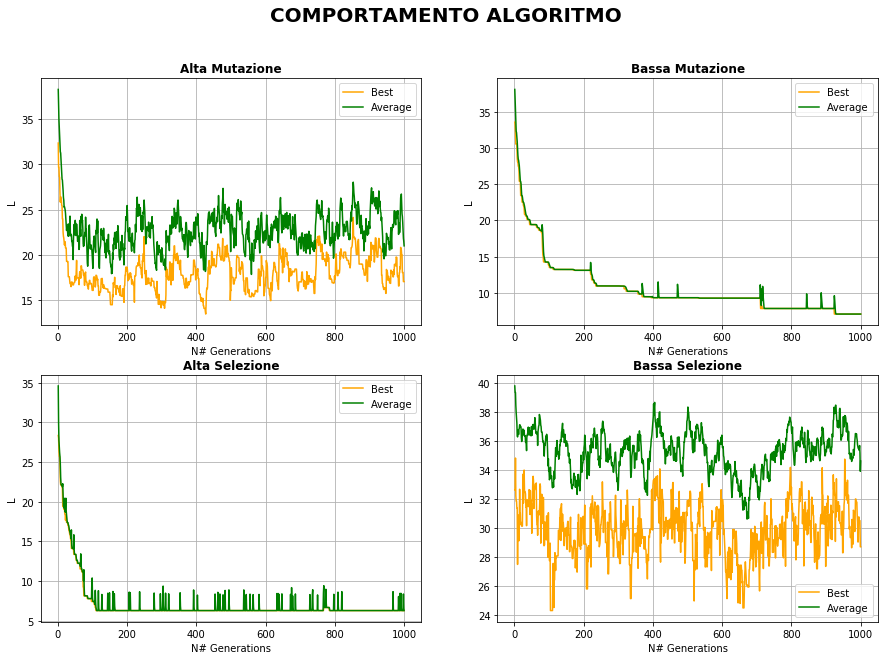

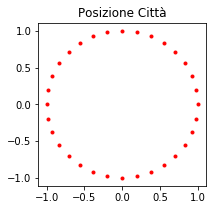

In [3]:
import matplotlib.pyplot as plt
import numpy as np


fig=plt.figure(figsize=(15,10))
fig.suptitle('COMPORTAMENTO ALGORITMO', fontsize=20, fontweight="bold")



plt.subplot(221)
x,L=np.loadtxt("LBestMH.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="orange", label="Best")
plt.title("Alta Mutazione", fontweight="bold")
plt.xlabel("N# Generations")
plt.ylabel("L")
plt.grid(True)
x,L=np.loadtxt("LAveMH.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="green", label="Average")
plt.grid(True)
plt.legend()

plt.subplot(222)
x,L=np.loadtxt("LBestML.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="orange", label="Best")
plt.title("Bassa Mutazione", fontweight="bold")
plt.xlabel("N# Generations")
plt.ylabel("L")
plt.grid(True)
x,L=np.loadtxt("LAveML.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="green", label="Average")
plt.grid(True)
plt.legend()

plt.subplot(223)
x,L=np.loadtxt("LBestSH.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="orange", label="Best")
plt.title("Alta Selezione", fontweight="bold")
plt.xlabel("N# Generations")
plt.ylabel("L")
plt.grid(True)
x,L=np.loadtxt("LAveSH.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="green", label="Average")
plt.grid(True)
plt.legend()


plt.subplot(224)
x,L=np.loadtxt("LBestSL.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="orange", label="Best")
plt.title("Bassa Selezione", fontweight="bold")
plt.xlabel("N# Generations")
plt.ylabel("L")
plt.grid(True)
x,L=np.loadtxt("LAveSL.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="green", label="Average")
plt.grid(True)
plt.legend()
plt.show()


fig=plt.figure(figsize=(3,3))
x =np.loadtxt("position_circle.out", usecols=(0), max_rows = 32, unpack=True)
y =np.loadtxt("position_circle.out", usecols=(0), skiprows = 32, unpack=True)
plt.title("Posizione Città")
plt.scatter(x, y, color="red", marker=".")
plt.show()

### Posizioni Casuali Circonferenza
Una volta determinati i valori migliori per effettuare la simulazione (riportati alla fine del primo paragrafo), sono state posizionate in modo casuale 32 città lungo una circonferenza di raggio unitario. In seguito sono riportati la lunghezza del cammino del miglior individuo e la lunghezza media della migliore metà della popolazione, in funzione della generazione. Inoltre, è presente sia un'istogramma della lunghezza dei cammini della popolazione iniziale, che la rappresentazione grafica delle città collegate dal miglior cammino della simulazione. 

Si può notare che dopo circa 250 generazioni l'individuo migliore ha raggiunto il percorso ottimale, e la popolazione media segue l'andamento del minimo, con picchi dovuti all'opera delle mutazioni. 

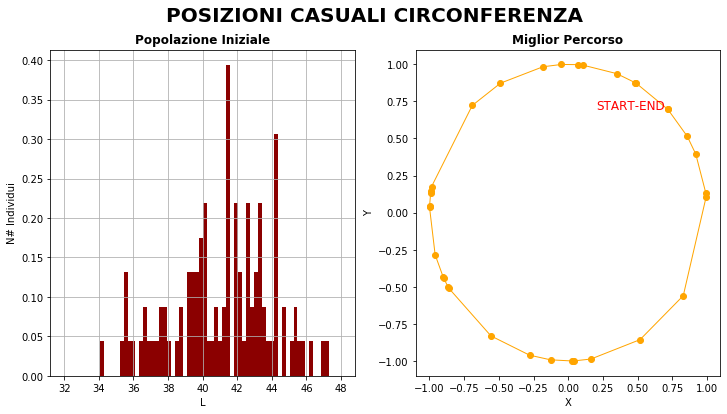

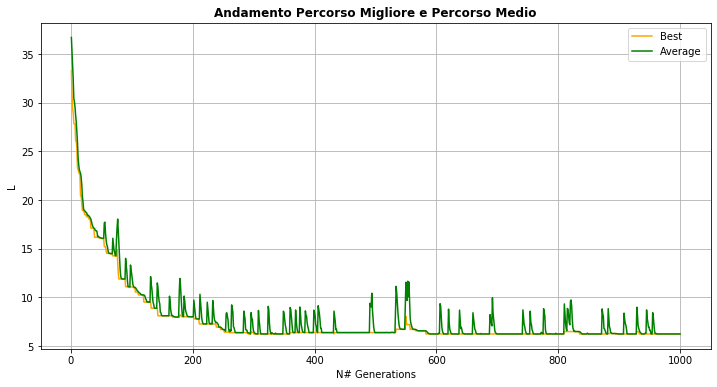

In [4]:
fig=plt.figure(figsize=(12,6))
fig.suptitle('POSIZIONI CASUALI CIRCONFERENZA', fontsize=20, fontweight="bold")
plt.subplot(121)
x=np.loadtxt("Circle_InitialL.out", usecols=(0), unpack=True)
plt.hist(x,70, range=(32,48), color='darkred', density=True)
plt.title('Popolazione Iniziale',  fontweight="bold")
plt.xlabel("L")
plt.ylabel("N# Individui")
plt.grid(True)
plt.subplot(122)
n,x,y =np.loadtxt("Circle_BestPath.out", usecols=(0, 1, 2), max_rows = 33, unpack=True)
plt.plot(x, y, '-o', color="Orange", linewidth=1)
plt.text(0.2, y[0], "START-END", color="Red", fontsize=12)
plt.title('Miglior Percorso',  fontweight="bold")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

fig=plt.figure(figsize=(12,6))

x,L=np.loadtxt("Circle_LBest.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="orange", label="Best")
plt.title("Andamento Percorso Migliore e Percorso Medio", fontweight="bold")
plt.xlabel("N# Generations")
plt.ylabel("L")
plt.grid(True)
x,L=np.loadtxt("Circle_LAve.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="green", label="Average")
plt.grid(True)
plt.legend()
plt.show()



### Posizioni Casuali Quadrato 
Sono state seguite le stesse procedure e mostrati i medesimi risultati della simulazione precedente, con la differenza che in questo caso le città inziali sono state estratte casualmente all'interno di un quadrato di lato unitario. 

La soluzione del seguente problema è resa più difficoltosa dalla presenza di diversi percorsi simili che possono portare l'algoritmo ad arrestarsi su un minimo locale. Come si può notare, da 200 a circa 600 generazioni, la popolazione si è stabilizzata ad un valore diverso dal minimo globale, raggiunto solo dopo 600 generazioni. 

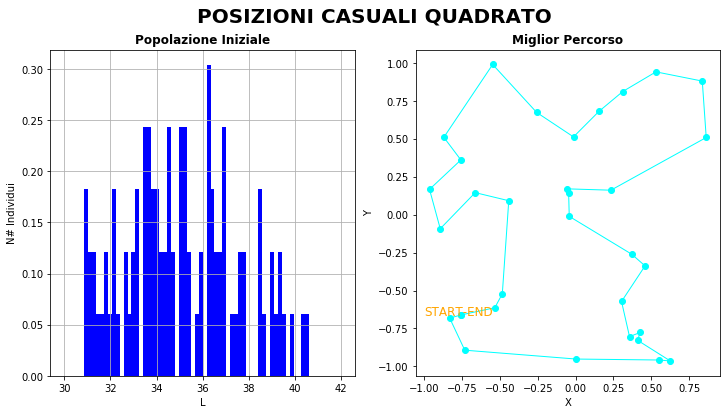

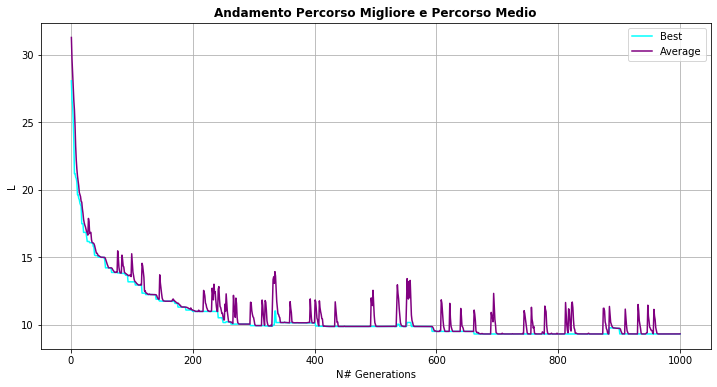

In [54]:
fig=plt.figure(figsize=(12,6))
fig.suptitle('POSIZIONI CASUALI QUADRATO', fontsize=20, fontweight="bold")
plt.subplot(121)
x=np.loadtxt("Square_InitialL.out", usecols=(0), unpack=True)
plt.hist(x,70, range=(30,42), color='Blue', density=True)
plt.title('Popolazione Iniziale',  fontweight="bold")
plt.xlabel("L")
plt.ylabel("N# Individui")
plt.grid(True)
plt.subplot(122)
n,x,y =np.loadtxt("Square_BestPath.out", usecols=(0, 1, 2), max_rows = 33, unpack=True)
plt.plot(x, y, '-o', color="Cyan", linewidth=1)
plt.text(-1, y[0], "START-END", color="orange", fontsize=12)
plt.title('Miglior Percorso',  fontweight="bold")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

fig=plt.figure(figsize=(12,6))

x,L=np.loadtxt("Square_LBest.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="cyan", label="Best")
plt.title("Andamento Percorso Migliore e Percorso Medio", fontweight="bold")
plt.xlabel("N# Generations")
plt.ylabel("L")
plt.grid(True)
x,L=np.loadtxt("Square_LAve.out", usecols=(0, 1), unpack=True)
plt.plot(x,L, color="purple", label="Average")
plt.grid(True)
plt.legend()
plt.show()
